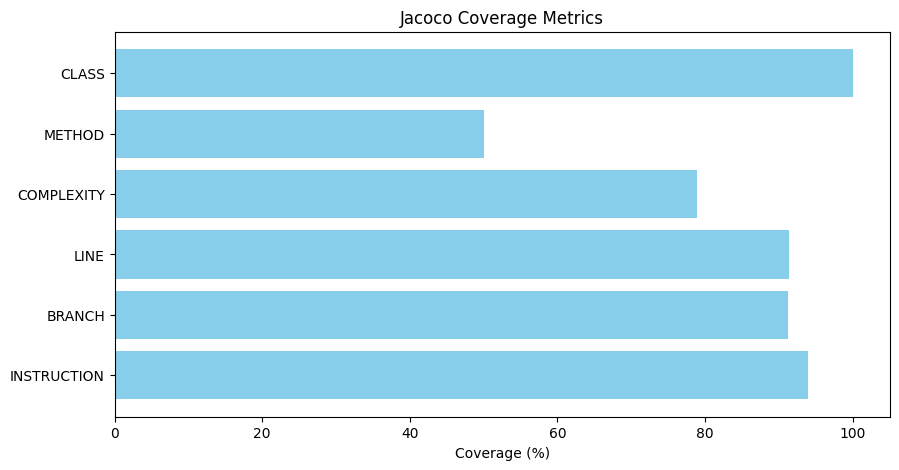

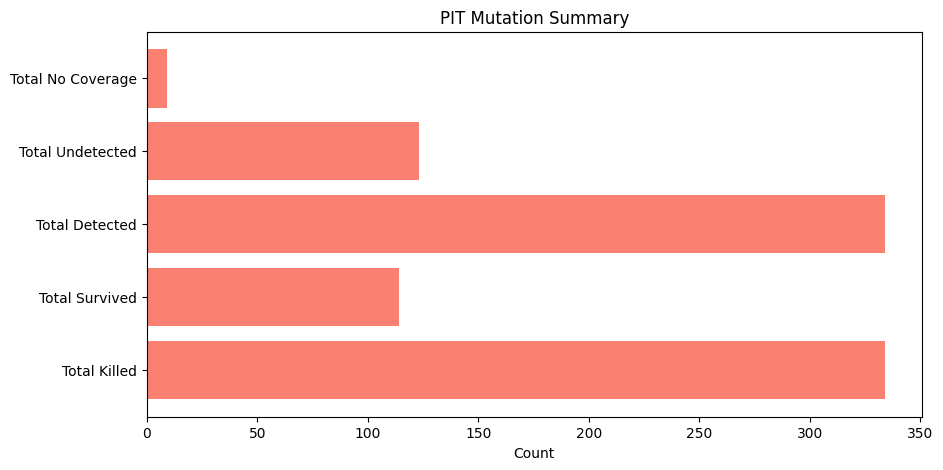

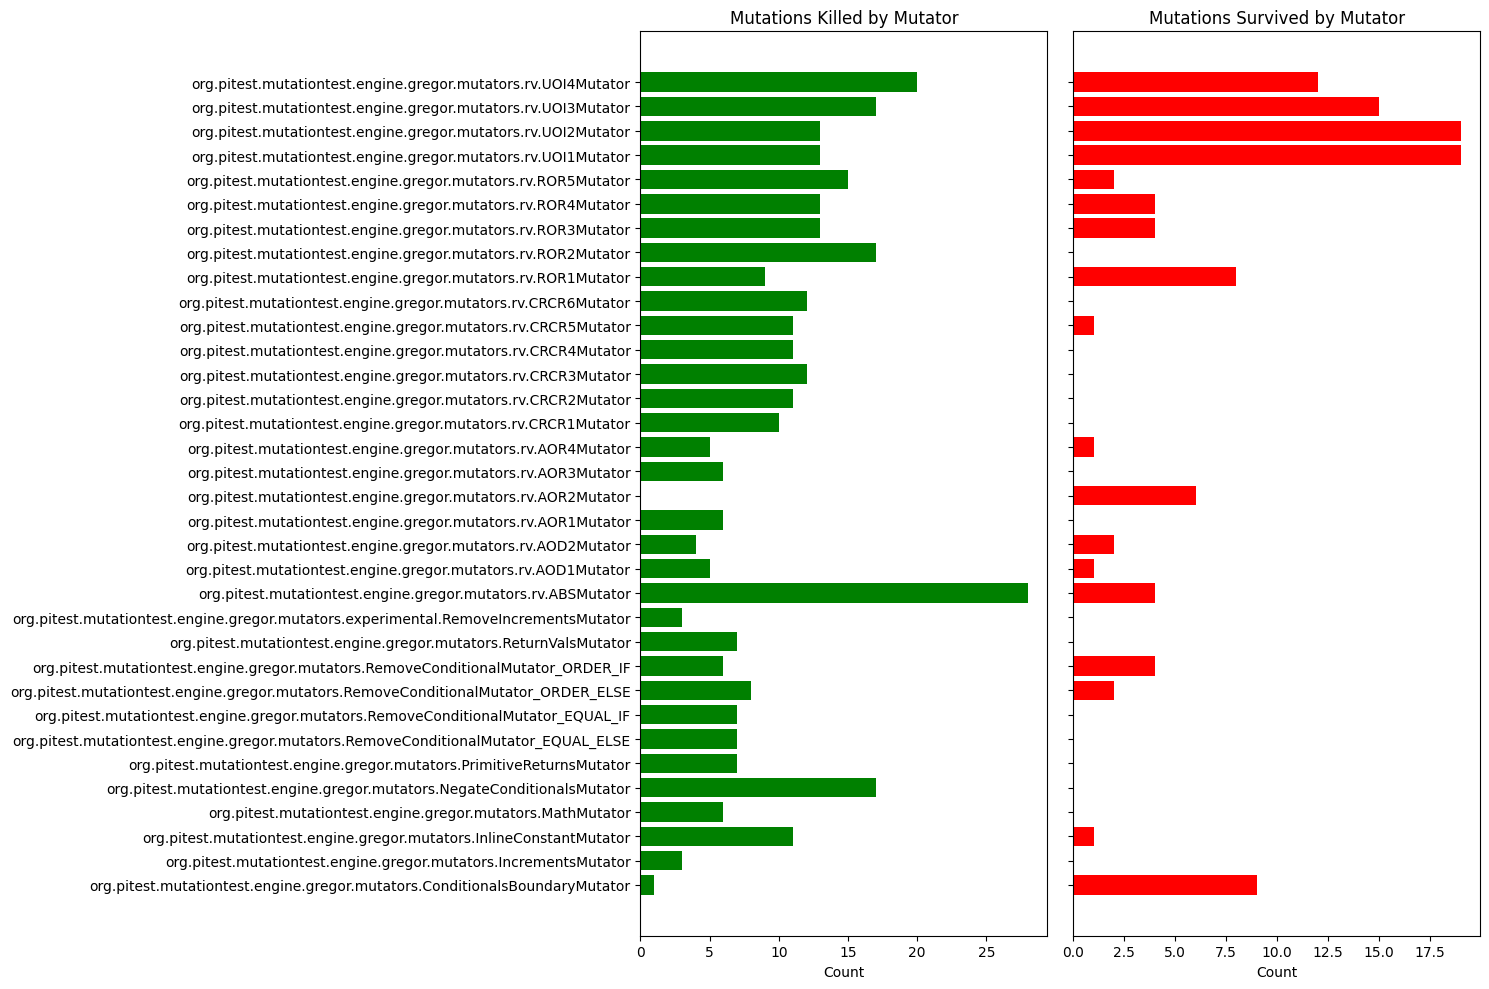

In [2]:
import json
import matplotlib.pyplot as plt

# Load JSON data from a file
with open('../metrics.json') as f:
    data = json.load(f)

# Extracting Jacoco metrics
jacoco_counters = data['jacoco_metrics']['counters']
jacoco_names = [counter['name'] for counter in jacoco_counters]
jacoco_coverage = [counter['coverage'] for counter in jacoco_counters]

# Plot Jacoco Coverage Metrics
plt.figure(figsize=(10, 5))
plt.barh(jacoco_names, jacoco_coverage, color='skyblue')
plt.xlabel('Coverage (%)')
plt.title('Jacoco Coverage Metrics')
plt.show()

# Extracting PIT metrics for total mutation summary
pit_metrics = data['pit_metrics']
pit_summary_names = ['Total Killed', 'Total Survived', 'Total Detected', 'Total Undetected', 'Total No Coverage']
pit_summary_values = [
    pit_metrics['total_killed'],
    pit_metrics['total_survived'],
    pit_metrics['total_detected'],
    pit_metrics['total_undetected'],
    pit_metrics['total_no_coverage']
]

# Plot PIT Mutation Summary
plt.figure(figsize=(10, 5))
plt.barh(pit_summary_names, pit_summary_values, color='salmon')
plt.xlabel('Count')
plt.title('PIT Mutation Summary')
plt.show()

# Detailed PIT mutator breakdown
mutator_names = [mutator['name'] for mutator in pit_metrics['mutators']]
killed_counts = [mutator['killed'] for mutator in pit_metrics['mutators']]
survived_counts = [mutator['survived'] for mutator in pit_metrics['mutators']]
detected_counts = [mutator['detected'] for mutator in pit_metrics['mutators']]
undetected_counts = [mutator['undetected'] for mutator in pit_metrics['mutators']]

# Plot for Killed and Survived by mutator
fig, ax = plt.subplots(1, 2, figsize=(15, 10), sharey=True)
ax[0].barh(mutator_names, killed_counts, color='green', label='Killed')
ax[0].set_title('Mutations Killed by Mutator')
ax[0].set_xlabel('Count')
ax[1].barh(mutator_names, survived_counts, color='red', label='Survived')
ax[1].set_title('Mutations Survived by Mutator')
ax[1].set_xlabel('Count')
plt.tight_layout()
plt.show()


In [4]:
def calculate_average_jacoco_coverage(data):
    total_coverage = {}
    counter_counts = {}

    for test_class, metrics in data.items():
        # Loop through the Jacoco counters for each class
        counters = metrics['jacoco_metrics']['counters']
        for counter in counters:
            counter_name = counter['name']
            coverage = counter['coverage']

            # Sum the coverage for each counter type
            if counter_name not in total_coverage:
                total_coverage[counter_name] = 0
                counter_counts[counter_name] = 0

            total_coverage[counter_name] += coverage
            counter_counts[counter_name] += 1

    # Calculate averages for each counter type
    average_coverage = {
        counter_name: (total_coverage[counter_name] / counter_counts[counter_name])
        for counter_name in total_coverage
    }

    return average_coverage

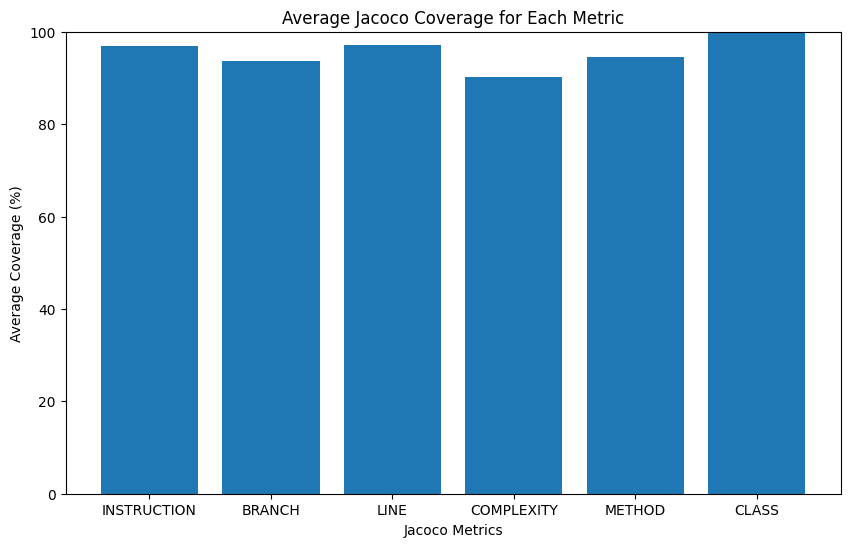

In [ ]:
with open('../metrics.json') as f:
    data = json.load(f)
# Calculate average Jacoco coverage
average_coverage = calculate_average_jacoco_coverage(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(average_coverage.keys(), average_coverage.values())
plt.xlabel("Jacoco Metrics")
plt.ylabel("Average Coverage (%)")
plt.title("Average Jacoco Coverage for Each Metric")
plt.ylim(0, 100)
plt.show()

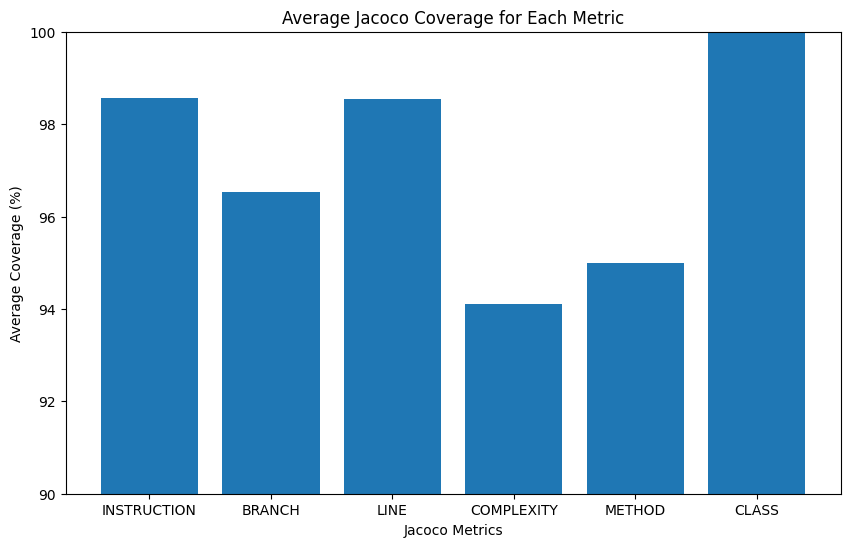

In [7]:
with open('../metrics.json') as f:
    data = json.load(f)
# Calculate average Jacoco coverage
average_coverage = calculate_average_jacoco_coverage(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(average_coverage.keys(), average_coverage.values())
plt.xlabel("Jacoco Metrics")
plt.ylabel("Average Coverage (%)")
plt.title("Average Jacoco Coverage for Each Metric")
plt.ylim(90, 100)
plt.show()